<a href="https://colab.research.google.com/github/sameer0013/Data-science/blob/main/Linear-%20Regression/PolynomialRegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [39]:
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)  

In [ ]:
X

In [ ]:
y

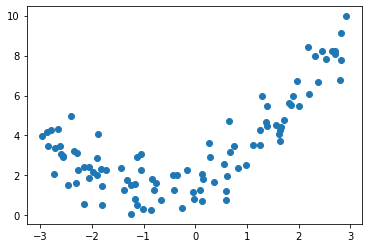

In [42]:
plt.scatter(X,y)
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X,y)
y_pred = lr.predict(X)

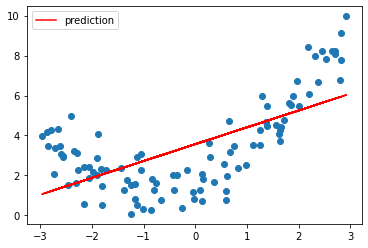

In [44]:
plt.scatter(X,y)
plt.plot(X,y_pred,"r-",label="prediction")
plt.legend()
plt.show()

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2 ,include_bias=False)
x_poly = poly.fit_transform(X,y)

print("X: ",X[0])
print("X_poly: ",x_poly[0])


X:  [-0.75275929]
X_poly:  [-0.75275929  0.56664654]


In [46]:
x_poly

array([[-7.52759287e-01,  5.66646544e-01],
       [ 2.70428584e+00,  7.31316190e+00],
       [ 1.39196365e+00,  1.93756281e+00],
       [ 5.91950905e-01,  3.50405874e-01],
       [-2.06388816e+00,  4.25963433e+00],
       [-2.06403288e+00,  4.26023172e+00],
       [-2.65149833e+00,  7.03044338e+00],
       [ 2.19705687e+00,  4.82705891e+00],
       [ 6.06690070e-01,  3.68072842e-01],
       [ 1.24843547e+00,  1.55859111e+00],
       [-2.87649303e+00,  8.27421218e+00],
       [ 2.81945911e+00,  7.94934969e+00],
       [ 1.99465584e+00,  3.97865194e+00],
       [-1.72596534e+00,  2.97895634e+00],
       [-1.90905020e+00,  3.64447265e+00],
       [-1.89957294e+00,  3.60837736e+00],
       [-1.17454654e+00,  1.37955958e+00],
       [ 1.48538590e-01,  2.20637127e-02],
       [-4.08329888e-01,  1.66733298e-01],
       [-1.25262516e+00,  1.56906979e+00],
       [ 6.71117368e-01,  4.50398522e-01],
       [-2.16303684e+00,  4.67872835e+00],
       [-1.24713211e+00,  1.55533850e+00],
       [-8.

In [47]:
lr = LinearRegression()
lr.fit(x_poly,y)

y_pred=lr.predict(x_poly)
print("Intercept: ",lr.intercept_)
print("coefcient: ",lr.coef_)

Intercept:  [1.78134581]
coefcient:  [[0.93366893 0.56456263]]


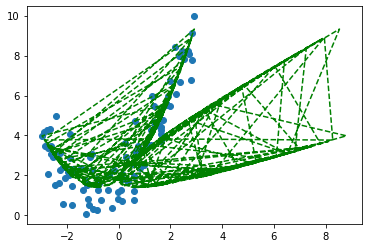

In [48]:
plt.scatter(X,y)
plt.plot(x_poly,y_pred,'g--')

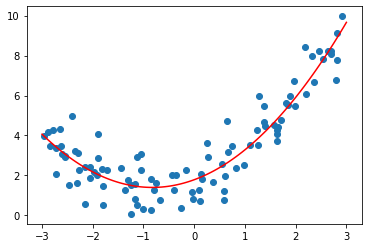

In [49]:
x_new = np.linspace(-3,3,100).reshape(100,1)
x_new_poly = poly.transform(x_new)

y_new_pred = lr.predict(x_new_poly)

plt.scatter(X,y)
plt.plot(x_new,y_new_pred,'r-',label="predictions")
plt.show()

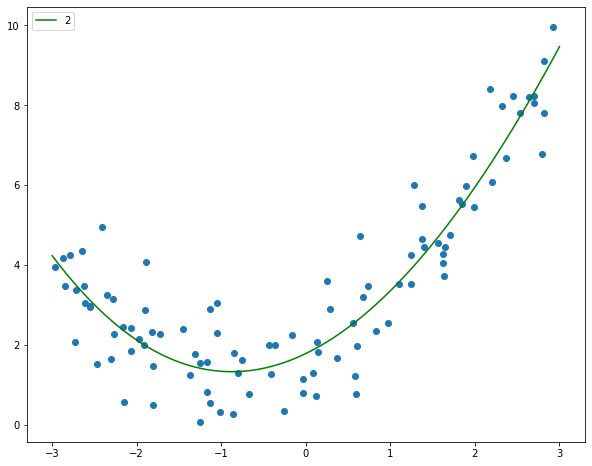

In [53]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
x_new = np.linspace(-3,3,100).reshape(100,1)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_feat = PolynomialFeatures(degree = 3,include_bias=False)
lin_reg = LinearRegression()
std_scl = StandardScaler()

polynomial_regression = Pipeline([
          ("poly_feat",poly_feat),
          ("stand_scal",std_scl),
          ("Lin_reg",lin_reg)
          ])

polynomial_regression.fit(X,y)

y_pr_predict = polynomial_regression.predict(x_new)

plt.figure(figsize=(10, 8))
plt.scatter(X,y)
plt.plot(x_new,y_pr_predict,"g-",label = str(2))
plt.legend()
plt.show()

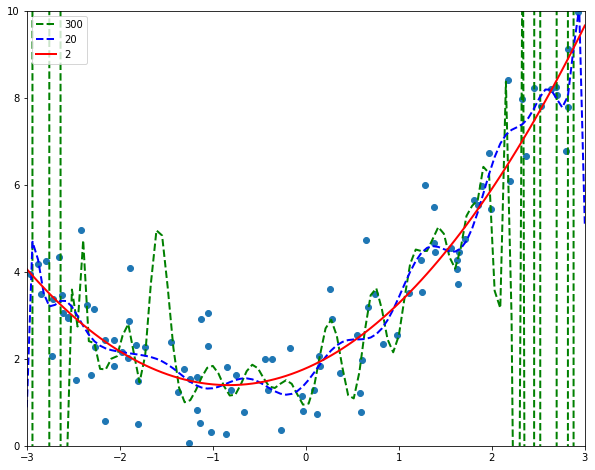

In [63]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
x_new = np.linspace(-3,3,100).reshape(100,1)

plt.figure(figsize=(10, 8))
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
for style,width,degre in [("g--",2,300),("b--",2,20),("r-",2,2)]:
  poly_feat = PolynomialFeatures(degree = degre,include_bias=False)
  lin_reg = LinearRegression()
  std_scl = StandardScaler()

  polynomial_regression = Pipeline([
            ("poly_feat",poly_feat),
            ("stand_scal",std_scl),
            ("Lin_reg",lin_reg)
            ])

  polynomial_regression.fit(X,y)

  y_pr_predict = polynomial_regression.predict(x_new)

  plt.plot(x_new,y_pr_predict,style,label = str(degre),linewidth=width)
plt.scatter(X,y)
plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.show()

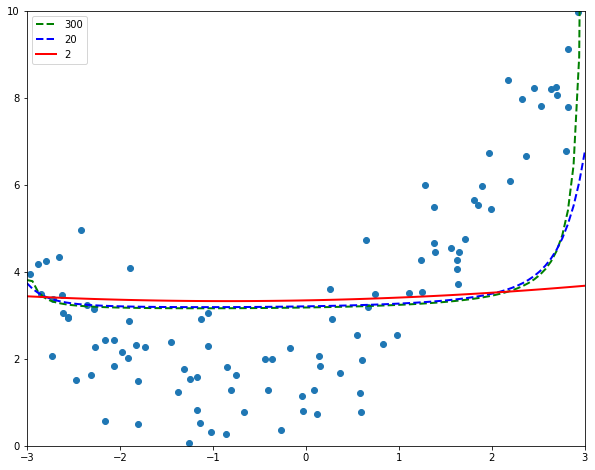

In [83]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
x_new = np.linspace(-3,3,100).reshape(100,1)

plt.figure(figsize=(10, 8))

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
for style,width,degre in [("g--",2,300),("b--",2,20),("r-",2,2)]:
  poly_feat = PolynomialFeatures(degree = degre,include_bias=False)
  rid_reg = Ridge(alpha=2000) # whenever we increase alpha underfit increase and when we decrease it overfit increase
  std_scl = StandardScaler()

  polynomial_regression = Pipeline([
            ("poly_feat",poly_feat),
            ("stand_scal",std_scl),
            ("rid_reg",rid_reg)
            ])

  polynomial_regression.fit(X,y)

  y_pr_predict = polynomial_regression.predict(x_new)

  plt.plot(x_new,y_pr_predict,style,label = str(degre),linewidth=width)


plt.scatter(X,y)

plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.show()

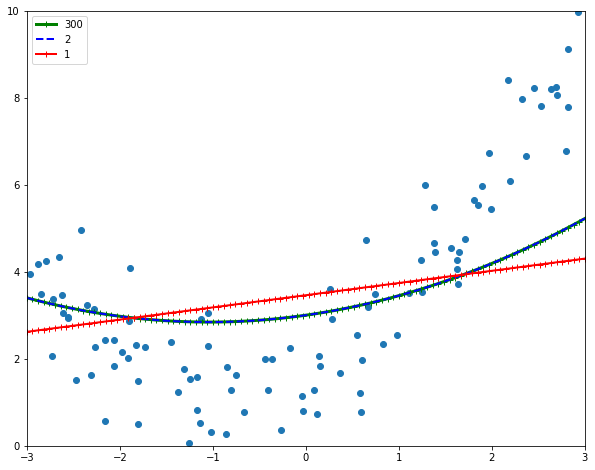

In [78]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
x_new = np.linspace(-3,3,100).reshape(100,1)

plt.figure(figsize=(10, 8))

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Lasso
for style,width,degre in [("g-+",3,300),("b--",2,2),("r-+",2,1)]:
  poly_feat = PolynomialFeatures(degree = degre,include_bias=False)
  las_reg = Lasso()
  std_scl = StandardScaler()

  polynomial_regression = Pipeline([
            ("poly_feat",poly_feat),
            ("stand_scal",std_scl),
            ("las_reg",las_reg)
            ])

  polynomial_regression.fit(X,y)

  y_pr_predict = polynomial_regression.predict(x_new)

  plt.plot(x_new,y_pr_predict,style,label = str(degre),linewidth=width)


plt.scatter(X,y)

plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.show()

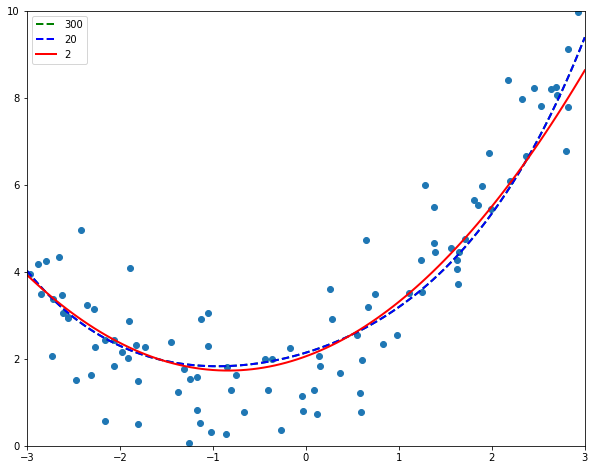

In [81]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1)
x_new = np.linspace(-3,3,100).reshape(100,1)

plt.figure(figsize=(10, 8))

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import ElasticNet
for style,width,degre in [("g--",2,300),("b--",2,20),("r-",2,2)]:
  poly_feat = PolynomialFeatures(degree = degre,include_bias=False)
  elastic_reg = ElasticNet(alpha=0.2)
  std_scl = StandardScaler()

  polynomial_regression = Pipeline([
            ("poly_feat",poly_feat),
            ("stand_scal",std_scl),
            ("rid_reg",elastic_reg)
            ])

  polynomial_regression.fit(X,y)

  y_pr_predict = polynomial_regression.predict(x_new)

  plt.plot(x_new,y_pr_predict,style,label = str(degre),linewidth=width)


plt.scatter(X,y)

plt.legend(loc="upper left")
plt.axis([-3,3,0,10])
plt.show()